In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Machine Learning/excelData/AnnualPowerLoad.csv")

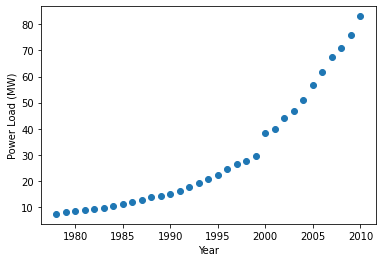

In [ ]:
x = df['Year']
y = df['Beijing city']

plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Power Load (MW)')
plt.show()

## **Extreme Learning**

In [ ]:
x_column = np.array([[y[i], y[i+1], y[i+2]] for i in range(y.shape[0]-3)])
y_true = np.array(y[3 : ])
y_true

array([ 8.67,  9.26,  9.56, 10.29, 11.06, 11.81, 12.85, 13.79, 14.22,
       15.05, 16.14, 17.6 , 19.25, 20.55, 22.26, 24.44, 26.36, 27.62,
       29.73, 38.44, 39.99, 44.  , 46.76, 51.01, 56.7 , 61.9 , 67.51,
       70.81, 75.89, 83.09])

In [ ]:
HiddenNode = 3
Win = np.random.randint(-1000, 1000, (x_column.shape[1], HiddenNode))/1000
Win

array([[ 0.87, -0.09, -0.78],
       [ 0.2 ,  0.07, -0.87],
       [-0.83,  0.6 ,  0.01]])

In [ ]:
# H = np.maximum(np.dot(x_column, Win), 0, np.dot(x_column, Win))   # ReLu as Activation function
# H = 1/(1 + np.exp(-np.dot(x_column, Win)))                        # Sigmoid as Activation function
H = np.dot(x_column, Win)
H

array([[   0.82,    4.99,  -12.61],
       [   1.41,    5.04,  -13.59],
       [   1.4 ,    5.35,  -14.1 ],
       [   1.37,    5.57,  -14.7 ],
       [   1.32,    5.97,  -15.42],
       [   1.09,    6.45,  -16.28],
       [   1.25,    6.89,  -17.51],
       [   1.2 ,    7.49,  -18.75],
       [   1.27,    8.05,  -20.23],
       [   2.  ,    8.28,  -21.85],
       [   2.2 ,    8.72,  -22.94],
       [   1.83,    9.39,  -23.99],
       [   1.55,   10.26,  -25.57],
       [   1.4 ,   11.25,  -27.67],
       [   1.91,   12.  ,  -30.23],
       [   2.17,   12.97,  -32.62],
       [   1.81,   14.27,  -35.1 ],
       [   2.12,   15.41,  -38.31],
       [   3.34,   16.1 ,  -41.66],
       [   3.5 ,   17.27,  -44.24],
       [  -2.27,   22.5 ,  -46.96],
       [  -0.03,   23.83,  -56.15],
       [   4.51,   25.56,  -64.26],
       [   4.33,   27.34,  -68.91],
       [   4.8 ,   29.71,  -74.39],
       [   3.29,   33.15,  -80.18],
       [   3.76,   36.25,  -88.38],
       [   5.04,   39.45,  -

# **If** $det(H^{T}\cdot H) = 0$

# **then** $H^{T}\cdot H$ is singluar matrix. We can't find inverse matrix.


In [ ]:
H_inv = np.dot(np.linalg.inv(np.dot(H.T, H)), H.T)
Wout = np.dot(H_inv, y_true)
Wout

array([0.45, 2.06, 0.11])

# **Predict**

In [ ]:
A = np.dot(Win, Wout)
A

array([0.13, 0.13, 0.86])

In [ ]:
y_predict = np.dot(x_column, A)
y_predict

array([ 9.3 ,  9.56, 10.14, 10.5 , 11.24, 12.03, 12.87, 13.95, 14.98,
       15.61, 16.49, 17.59, 19.08, 20.83, 22.34, 24.19, 26.44, 28.59,
       30.2 , 32.41, 40.3 , 43.05, 47.77, 50.86, 55.37, 61.15, 66.89,
       73.09, 77.31, 82.79])

In [ ]:
y_true

array([ 8.67,  9.26,  9.56, 10.29, 11.06, 11.81, 12.85, 13.79, 14.22,
       15.05, 16.14, 17.6 , 19.25, 20.55, 22.26, 24.44, 26.36, 27.62,
       29.73, 38.44, 39.99, 44.  , 46.76, 51.01, 56.7 , 61.9 , 67.51,
       70.81, 75.89, 83.09])

In [ ]:
RMSE = np.sqrt(np.mean((y_true - y_predict)**2))
RMSE

1.314525464771853

## **Simple to Implement!**

In [ ]:
def ExtremeLearning(X, y_true, HiddenNode=1000):
    y_predict, Hidden, RMSE = None, None, None
    while True:
        ' Random weight between input layer and H layer '
        Win = np.random.randint(-1000, 1000, (X.shape[1], HiddenNode))

        ' Calculate H layer '
        # H = np.maximum(np.dot(X, Win), 0, np.dot(X, Win))   # ReLu as Activation function
        H = np.dot(X, Win)

        ' Calculate pseudo inverse '
        if np.linalg.det(np.dot(H.T, H)) != 0.0 :
            H_inv = np.dot(np.linalg.inv(np.dot(H.T, H)), H.T)
        else :
            print('Singular matrix occur with bad random weight.')
            continue

        ' Calculate weight between H layer and output layer '
        Wout = np.dot(H_inv, y_true)

        ' Calculate Hidden matrix between input and output '
        Hidden = np.dot(Win, Wout)

        ' Calculate output '
        y_predict = np.dot(X, Hidden)

        ' Calculate root mean squart error '
        RMSE = np.sqrt(np.mean((y_true - y_predict)**2))
        break

    return y_predict, Hidden, RMSE

# Set input and actual output

In [ ]:
x_column = np.array([[y[i], y[i+1], y[i+2]] for i in range(y.shape[0]-3)])
y_true = np.array(y[3 : ])

**Call ExtremeLearning function**

In [ ]:
y_predict, Hidden, RMSE = ExtremeLearning(x_column, y_true, HiddenNode=3)
print(y_predict)
print(RMSE)

[ 9.3   9.56 10.14 10.5  11.24 12.03 12.87 13.95 14.98 15.61 16.49 17.59
 19.08 20.83 22.34 24.19 26.44 28.59 30.2  32.41 40.3  43.05 47.77 50.86
 55.37 61.15 66.89 73.09 77.31 82.79]
1.314525464771853


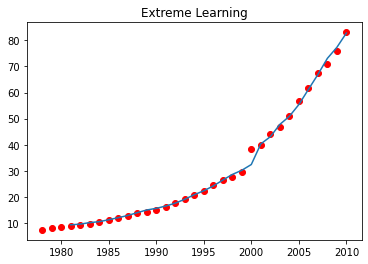

In [ ]:
plt.scatter(x, y, color='r')
plt.plot(x[3:], y_predict)
plt.title('Extreme Learning')
plt.show()